In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import os
import numpy as np
import seaborn as sb

In [7]:
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == "Darwin":  # macOS
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":  # Windows
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)
elif platform.system() == "Linux":  # Linux (Ubuntu, Docker 등)
    font_path = "fonts/NanumGothic.ttf"
    if not os.path.exists(font_path):
        st.error("NanumGothic.ttf 폰트 파일이 존재하지 않습니다. 'fonts' 폴더 내에 폰트 파일을 확인하세요.")
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc("font", family=font_name)

#### 지역별 수출 트렌드 보여주는 차트

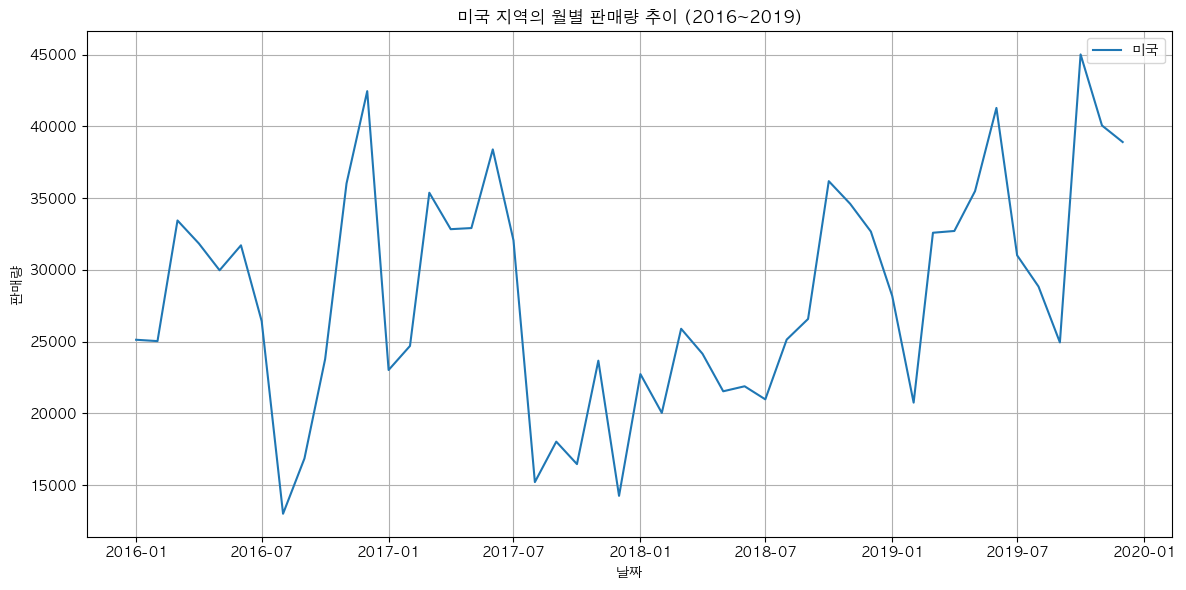

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../../data/processed/지역별판매 복사본.csv"
df = pd.read_csv(file_path)

# 지역별 데이터 라인 차트로 시각화 (연도 범위 지정 가능)
def plot_region_trend(region_name, start_year=None, end_year=None):
    # '대륙' 컬럼 제거 및 지역 필터링
    region_data = df.drop(columns=['대륙'])
    region_data = region_data[region_data['지역명'] == region_name]
    
    if region_data.empty:
        print(f"❌ 지역 '{region_name}'에 해당하는 데이터가 없습니다.")
        return

    # 시계열로 변환
    sales_series = region_data.iloc[:, 1:].T
    sales_series.columns = [region_name]
    sales_series.index = pd.to_datetime(sales_series.index)
    sales_series = sales_series.asfreq('MS')

    # 연도 범위 필터링
    if start_year:
        sales_series = sales_series[sales_series.index.year >= start_year]
    if end_year:
        sales_series = sales_series[sales_series.index.year <= end_year]

    if sales_series.empty:
        print(f"❌ {start_year}년부터 {end_year}년 사이의 데이터가 없습니다.")
        return

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(sales_series.index, sales_series[region_name], label=region_name)
    plt.title(f"{region_name} 지역의 월별 판매량 추이 ({start_year}~{end_year})")
    plt.xlabel("날짜")
    plt.ylabel("판매량")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 사용 예시
plot_region_trend("미국", start_year=2016, end_year=2019)

#### 공장 및 거래 구분별 차량 판매 트렌드 보여주는 차트

In [40]:
import pandas as pd
import plotly.graph_objects as go

def plot_factory_trends_interactive(factory_name, trade_type, start_year, end_year):
    df = pd.read_csv("../../data/processed/공장별판매 복사본.csv")

    # 필터링
    filtered = df[(df['공장명(국가)'] == factory_name) & (df['거래 구분'] == trade_type)]

    if filtered.empty:
        print("❌ 해당 조건에 맞는 데이터가 없습니다.")
        return

    # 데이터 변환
    melted = filtered.melt(id_vars=['공장명(국가)', '차종', '거래 구분'], var_name='월', value_name='판매량')
    melted['월'] = pd.to_datetime(melted['월'], errors='coerce')
    melted = melted.dropna(subset=['월'])

    # 연도 범위 필터링 및 0 제거
    melted = melted[(melted['월'].dt.year >= start_year) & (melted['월'].dt.year <= end_year)]
    melted = melted[melted['판매량'] != 0]

    if melted.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return

    fig = go.Figure()
    car_types = melted['차종'].unique()

    for idx, car_type in enumerate(car_types):
        data = melted[melted['차종'] == car_type]
        fig.add_trace(go.Scatter(
            x=data['월'],
            y=data['판매량'],
            mode='lines+markers',
            name=car_type,
            line=dict(width=1),
            showlegend=True  # ✅ 범례 표시 강제
        ))

    fig.update_layout(
        title=f"{factory_name} 공장 - {trade_type} 품목의 차종별 판매 추이 ({start_year}~{end_year})",
        xaxis_title="월",
        yaxis_title="판매량",
        legend_title="차종",
        height=600,
        template='plotly_white',
    )

    fig.show()

# 사용 예시
plot_factory_trends_interactive("중국 (베이징)", "내수", 2016, 2023)

#### 차종별 판매 트렌드 보여주는 차트